# Diferenciación automática: Parte 2

In [1]:
"""Definición de los duales, donde
...
"""
type Dual{T<:Real}
    fun :: T
    der :: T
end

Dual(a,b) = Dual(promote(a,b)...)

Dual(a) = Dual(a,0)

xdual(x) = Dual(x,1)

using Base.Test

import Base: +, -, *, /, ^, ==

+(a::Dual,b::Dual) = Dual(a.fun + b.fun, a.der + b.der)
+(a::Real,b::Dual) = Dual(a) + b
+(b::Dual,a::Real) = b + Dual(a)

-(a::Dual,b::Dual) = Dual(a.fun - b.fun, a.der - b.der)
-(a::Real,b::Dual) = Dual(a) - b
-(b::Dual,a::Real) = b - Dual(a)

*(a::Dual,b::Dual) = Dual(a.fun*b.fun, a.fun*b.der + b.fun*a.der)
*(a::Real,b::Dual) = Dual(a)*b
*(b::Dual,a::Real) = a*b

/(a::Dual,b::Dual) = Dual(a.fun/b.fun, (a.der - (a.fun/b.fun)*b.der)/b.fun)
/(a::Real,b::Dual) = Dual(a)/b
/(b::Dual,a::Real) = b/Dual(a)

^(a::Dual,b::Integer) = Dual(a.fun^b, b*(a.fun^(b-1))*a.der)
^(a::Dual,b::Real) = Dual(a.fun^b, b*(a.fun^(b-1))*a.der)

+(a::Dual) = a
-(a::Dual) = Dual(-a.fun,-a.der)

- (generic function with 208 methods)

### NOTA

Este notebook se iniciará en la clase y **debe** hacerse en equipo, con los *mismos miembros* que participaron en la "Tarea4.ipynb". La resolución completa de los ejercicios debe ser enviada como "Tarea5.ipynb".

## Funciones elementales

Lo que se logró en la clase pasada fue, esencialmente, tener una manera de obtener primeras
derivadas para cualquier función racional, esto es, cocientes de polinomios en una variable.

El siguiente paso es incluir más funciones a fin de ampliar la aplicabilidad de lo hecho la vez pasada, en particular a las funciones elementales: $\exp$, $\log$, etc.

La extensión a estas funciones es elemental, y así por ejemplo tenemos:

\begin{eqnarray}
\exp[\vec{f}(x_0)] &=& \big( \exp(f_0),\, f'_0\exp(f_0) \,\big),\\
\log[\vec{f}(x_0)] &=& \big( \log(f_0),\, \frac{f'_0}{f_0} \,\big),\\
\sin[\vec{f}(x_0)] &=& \big( \sin(f_0),\, f'_0\cos(f_0) \,\big),\\
\cos[\vec{f}(x_0)] &=& \big( \cos(f_0),\, -f'_0\sin(f_0) \,\big),\\
\tan[\vec{f}(x_0)] &=& \big( \tan(f_0),\, f'_0\sec^2(f_0) \,\big),\\
\sinh[\vec{f}(x_0)] &=& \big( \sinh(f_0),\, f'_0\cosh(f_0) \,\big),\\
...\\
\end{eqnarray}

Vale la pena enfatizar que la regla de la cadena se utiliza en la segunda componente del 
lado derecho de estas ecuaciones.

## Ejercicio

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.org/en/release-0.4/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea5.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Aprovechen las capacidades de Julia en metaprogramming.

In [2]:
import Base: log, exp, sin, cos, tan, sec, cot, csc, sinh, cosh, tanh, asin, acos, atan

In [8]:
for (f,d) = [(:exp,:exp),(:log,:inv),(:sin,:cos),(:cos,x -> -sin(x)),(:tan,x -> sec(x)^2),(:sec,x -> sec(x)*tan(x)),
             (:cot, x -> -csc(x)^2),(:csc,x -> -csc(x)*cot(x)),(:sinh,:cosh),(:cosh,:sinh),(:tanh,x -> sech(x)^2),
             (:asin,x -> inv(sqrt(1-x^2))),(:acos,X -> -inv(sqrt(1-x^2))),(:atan,x -> inv(1+x^2))]
    
    println(f)
    ex = quote
        function ($f)(a::Dual)
            fun = ($f)(a.fun)
            der = a.der*($d)(a.fun)
            return Dual(fun, der)
        end
    end
    println(ex)
    @eval $ex
end

exp
begin  # In[8], line 6:
    function exp(a::Dual) # In[8], line 7:
        fun = exp(a.fun) # In[8], line 8:
        der = a.der * exp(a.fun) # In[8], line 9:
        return Dual(fun,der)
    end
end
log
begin  # In[8], line 6:
    function log(a::Dual) # In[8], line 7:
        fun = log(a.fun) # In[8], line 8:
        der = a.der * inv(a.fun) # In[8], line 9:
        return Dual(fun,der)
    end
end
sin
begin  # In[8], line 6:
    function sin(a::Dual) # In[8], line 7:
        fun = sin(a.fun) # In[8], line 8:
        der = a.der * cos(a.fun) # In[8], line 9:
        return Dual(fun,der)
    end
end
cos
begin  # In[8], line 6:
    function cos(a::Dual) # In[8], line 7:
        fun = cos(a.fun) # In[8], line 8:
        der = a.der * ((anonymous function))(a.fun) # In[8], line 9:
        return Dual(fun,der)
    end
end
tan
begin  # In[8], line 6:
    function tan(a::Dual) # In[8], line 7:
        fun = tan(a.fun) # In[8], line 8:
        der = a.der * ((anonymous function))(a.fun) 

In [14]:
exp(xdual(1))

Dual{Float64}(2.718281828459045,2.718281828459045)

In [15]:
log(xdual(1))

Dual{Float64}(0.0,1.0)

In [17]:
sin(xdual(π))

Dual{Float64}(1.2246467991473532e-16,-1.0)

In [19]:
cos(xdual(π))

Dual{Float64}(-1.0,-1.2246467991473532e-16)

## Ejercicio

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [124]:
using PyPlot

In [23]:
f(x) = sin(x^3 - (2/(x^6)))

f (generic function with 1 method)

In [42]:
x₀ = 2

f(xdual(x₀))

Dual{Float64}(0.9934213368955197,-1.384934905523464)

$f'(x) = \Big(3x^2 + \frac{12}{x^7}\Big)cos\Big(x^3 - \frac{2}{x^6}\Big)$

In [51]:
f_der(x) = (3*x^2 + 12/(x^7))*cos(x^3 - (2/(x^6)))

(f(x₀),f_der(x₀))

(0.9934213368955197,-1.384934905523464)

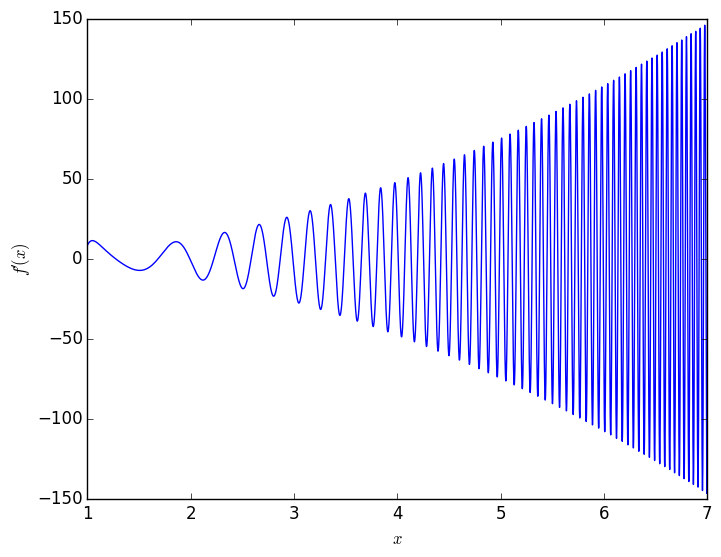

In [134]:
xs = (1:0.001:7)

ys = [f(xdual(x)).der for x in xs]

plot(xs,ys)
ylabel(L"f'(x)")
xlabel(L"x");

# Ejercicio

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [65]:
nombre(n::Int) = symbol( string("W_", n) )

function wilkinson(n::Int)
    # Checo que `n` sea >= 1
    @assert n >= 1
    
    ex = :(x-1)
    for i = 2:n
        ex = :( ($ex) * ( x-$i) )
    end
    ex_ret = :( $(nombre(n))(x) = $ex )
    ex_ret
end

wilkinson (generic function with 1 method)

In [119]:
function newton1D(f,x₀)
    i = 1
    while abs(f(x₀)) != 0   
        F = f(xdual(x₀))
        x_nueva = x₀ - (F.fun/F.der)
        x₀ = x_nueva
        i += 1 
        if i == 50
            println("f($x₀) = $(f(x₀))")
            return x₀  
        end
    end
    println("f($x₀) = $(f(x₀))")
    return x₀
end   

newton1D (generic function with 2 methods)

In [120]:
x₀ = 1.5
newton1D(x -> x^2-1,x₀)
plot((-3:0.01:3),)

f(1.0) = 0.0


1.0

In [121]:
eval(wilkinson(6))

W_6 (generic function with 1 method)

In [122]:
x₀ = 2.2

newton1D(W_6,x₀)

f(2.0) = 0.0


2.0

In [123]:
x₀ = 2.45

newton1D(W_6,x₀)

f(6.0) = 0.0


6.0

In [91]:
g(x) = x*sin(2*x)

g (generic function with 1 method)

In [118]:
x₀ = 0.7

newton1D(x -> g(x),x₀)

f(4.22508958034914e-31) = 3.570276392394975e-61


4.22508958034914e-31

# Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea; la idea es empezar a pensar en esto.